In [36]:
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib.request
import zipfile
import os

In [2]:
# Data Sources
urls = ['https://www.bls.gov/oes/special.requests/oesm17ma.zip', 
'https://www.bls.gov/oes/special.requests/oesm16ma.zip',
'https://www.bls.gov/oes/special.requests/oesm15ma.zip',
'https://www.bls.gov/oes/special.requests/oesm14ma.zip',
'https://www.bls.gov/oes/special.requests/oesm13ma.zip',
'https://www.bls.gov/oes/special.requests/oesm12ma.zip',
'https://www.bls.gov/oes/special.requests/oesm11ma.zip',
'https://www.bls.gov/oes/special.requests/oesm10ma.zip',
'https://www.bls.gov/oes/special.requests/oesm09ma.zip',
'https://www.bls.gov/oes/special.requests/oesm08ma.zip']

oeszip = ['data/raw/oesm17ma.zip', 
'data/raw/oesm16ma.zip',
'data/raw/oesm15ma.zip',
'data/raw/oesm14ma.zip',
'data/raw/oesm13ma.zip',
'data/raw/oesm12ma.zip',
'data/raw/oesm11ma.zip',
'data/raw/oesm10ma.zip',
'data/raw/oesm09ma.zip',
'data/raw/oesm08ma.zip']

oesData = {'2008': {
            'inFiles': {
                1: {'filename': "./Data/raw/MSA__M2008_dl_1.xls", 'sheet': "MSA_dl_1"},
                2: {'filename': "./Data/raw/MSA_M2008_dl_2.xls", 'sheet': "MSA_dl_2"},
                3: {'filename': "./Data/raw/MSA_M2008_dl_3.xls", 'sheet': "MSA_dl_3"}
            },
            'outFile': 'data/preprocessed/oes2008.csv',
            },
           '2009': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_dl_1.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_dl_2.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_dl_3.xls",'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2009.csv', 
           },
           '2010': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_M2010_dl_1.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_M2010_dl_2.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_M2010_dl_3.xls", 'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2010.csv', 
           },
           '2011': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_M2011_dl_1_AK_IN.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_M2011_dl_2_KS_NY.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_M2011_dl_3_OH_WY.xls", 'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2011.csv', 
           },
           '2012': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_M2012_dl_1_AK_IN.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_M2012_dl_2_KS_NY.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_M2012_dl_3_OH_WY.xls", 'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2012.csv', 
           },
           '2013': {
               'inFiles': { 
                   1: {'filename': "./Data/raw/MSA_M2013_dl_1_AK_IN.xls", 'sheet': "MSA_dl_1"},
                   2: {'filename': "./Data/raw/MSA_M2013_dl_2_KS_NY.xls", 'sheet': "MSA_dl_2"},
                   3: {'filename': "./Data/raw/MSA_M2013_dl_3_OH_WY.xls", 'sheet': "MSA_dl_3"}
               },
               'outFile': 'data/preprocessed/oes2013.csv', 
           },
           '2014': {
               'inFiles': { 
                   1: {'filename': "./data/raw/oesm14ma/MSA_M2014_dl.xlsx", 'sheet': "MSA_dl"}
               },
               'outFile': 'data/preprocessed/oes2014.csv', 
           },
           '2015': {
               'inFiles': { 
                   1: {'filename': "./data/raw/oesm15ma/MSA_M2015_dl.xlsx", 'sheet': "MSA_dl_1"}
               },
               'outFile': 'data/preprocessed/oes2015.csv', 
           },
           '2016': {
               'inFiles': { 
                   1: {'filename': "./data/raw/oesm16ma/MSA_M2016_dl.xlsx", 'sheet': "MSA_dl_1"}
               },
               'outFile': 'data/preprocessed/oes2016.csv', 
           },
           '2017': {
               'inFiles': { 
                   1: {'filename': "./data/raw/oesm17ma/MSA_M2017_dl.xlsx", 'sheet': "MSA_dl_1"}
               },
               'outFile': 'data/preprocessed/oes2017.csv', 
           }
        }
oesfile = "./data/preprocessed/oes.csv"

In [3]:
def getData(urls, files):
    for i, j in zip(urls, files):
        urllib.request.urlretrieve(i, j)
        with zipfile.ZipFile(j) as oeszip:
            oeszip.extractall(path = 'data/raw/')            
#getData(urls, oeszip)  

In [24]:
def prepData():
    directory = "./data/preprocessed"
    if not os.path.exists(directory):
        os.makedirs(directory)
    dfcols = ['YEAR', 'PRIM_STATE', 'AREA', 'AREA_NAME', 'OCC_CODE', 'OCC_TITLE', 'TOT_EMP',
              'EMP_PRSE', 'JOBS_1000','A_MEAN', 'MEAN_PRSE', 'A_MEDIAN',
              'TOT_EMP_SE', 'TOT_EMP_ME', 'JOBS_1000_SE','JOBS_1000_ME',
              'A_MEAN_SE', 'A_MEAN_ME', 'A_MEDIAN_SE', 'A_MEDIAN_ME']
    allData = []
    for year, info in oesData.items():
        
        # Concatenate files
        dfs = []
        for file in info['inFiles']:
            xl = pd.ExcelFile(info['inFiles'][file]['filename'])
            pdf = xl.parse(info['inFiles'][file]['sheet'])
            dfs.append(pdf)
        df = pd.concat(dfs)
        
        # Remove NAs, missing values, and convert strings to numeric, and add year to dataframe
        df = (df
              .replace(["**", "*", "#"], pd.np.nan).dropna(axis=0, how = 'any',
                                                          subset = ['TOT_EMP', 'EMP_PRSE',
                                                                    'A_MEAN', 'MEAN_PRSE',
                                                                    'A_MEDIAN'])
              .apply(pd.to_numeric, errors = 'ignore')
              .assign(YEAR = year))
        
        # Create JOBS_1000 variable for 2008 data
        if (year == '2008'):
            df2cols = ['AREA', 'TOT_EMP']
            df2 =  (df[(df.OCC_CODE == '00-0000')]
                    .drop(df.columns.difference(df2cols), axis = 1, inplace = False)
                    .rename(columns = {'TOT_EMP': 'TOT_EMP_ALL'}))
            df = (df.merge(df2, how = 'left', on = 'AREA')
              .assign(JOBS_1000 = lambda x: x.TOT_EMP / (x.TOT_EMP_ALL/1000)))         
                
        # Compute standard errors 
        df = df.assign(TOT_EMP_SE = lambda x: x.TOT_EMP * x.EMP_PRSE / 100,
                  JOBS_1000_SE = lambda x: x.JOBS_1000 * x.EMP_PRSE / 100,
                  A_MEAN_SE = lambda x: x.A_MEAN * x.MEAN_PRSE / 100,
                  A_MEDIAN_SE = lambda x: x.MEAN_PRSE * x.A_MEAN * 1.2533 / 100)
        
        # Compute margin of errors 
        df = df.assign(TOT_EMP_ME = lambda x: 1.96 * x.TOT_EMP_SE,
                  JOBS_1000_ME = lambda x: 1.96 * x.JOBS_1000_SE,
                  A_MEAN_ME = lambda x: 1.96 * x.A_MEAN_SE,
                  A_MEDIAN_ME = lambda x: 1.96 * x.A_MEDIAN_SE)
        
        # Select Math and CS Jobs, relevant columns, write to file and append to all data.
        df = (df[(df.OCC_CODE == '15-0000')]
              .drop(df.columns.difference(dfcols), axis = 1, inplace = False))
        df.to_csv(path_or_buf = info['outFile'])        
        allData.append(df)
        
    # Concatenate allData into single data frame and write to file
    df = pd.concat(allData)
    df.set_index("AREA_NAME")
    df.to_csv(path_or_buf = oesfile)
    return df
#df = prepData()

In [25]:
def processData(oesfile):
    df = pd.read_csv(oesfile, encoding = 'latin1')

    # Prepare data
    cols = ['AREA', 'AREA_NAME', 'A_MEDIAN', 'JOBS_1000', 'TOT_EMP',
            'TOT_EMP_ME', 'JOBS_1000_ME', 'A_MEAN_ME', 'A_MEDIAN_ME']
    df2008 = (df[(df.YEAR == 2008)]
               .drop(df.columns.difference(cols), axis = 1, inplace = False)
               .rename(columns = {'A_MEDIAN': 'A_MEDIAN_2008',
                                  'JOBS_1000': 'JOBS_1000_2008',
                                  'TOT_EMP': 'TOT_EMP_2008'}))

    df2017 = (df[(df.YEAR == 2017)]
               .drop(df.columns.difference(cols), axis = 1, inplace = False)
               .rename(columns = {'A_MEDIAN': 'A_MEDIAN_2017',
                                  'JOBS_1000': 'JOBS_1000_2017',
                                  'TOT_EMP': 'TOT_EMP_2017'}))

    compare = pd.merge(left = df2008, right = df2017, how = 'left', on = 'AREA')
    compare = (compare
               .assign(SALARY_PCT_GROWTH = lambda x: (x.A_MEDIAN_2017 - x.A_MEDIAN_2008) / x.A_MEDIAN_2008 * 100,
                       JOB_PCT_GROWTH = lambda x: (x.TOT_EMP_2017 - x.TOT_EMP_2008) / x.TOT_EMP_2008 * 100,
                       JOB_DENSITY_PCT_GROWTH = lambda x: (x.JOBS_1000_2017 - x.JOBS_1000_2008) / x.JOBS_1000_2008 * 100))
    return df, df2017, compare
df, df2017, compare = processData(oesfile)

In [30]:
def topSalaryData(df, df2017, compare):
    # Get top locations by salary (2017) and salary growth (2008-2017)
    topSalary = df2017.nlargest(n = 10, columns = 'A_MEDIAN_2017')
    topSalaryGrowth = compare.nlargest(n = 10, columns = 'SALARY_PCT_GROWTH')
    topSalaryGrowth = pd.merge(left = df, right = topSalaryGrowth[['AREA']], how = 'inner', on = 'AREA')
    return topSalary, topSalaryGrowth

def topJobsData(df, df2017, compare):
    # Get top locations by employment (2017) and employment growth (2008-2017)
    topJobs = df2017.nlargest(n = 10, columns = 'TOT_EMP_2017')
    topJobGrowth = compare.nlargest(n = 10, columns = 'JOB_PCT_GROWTH')
    topJobGrowth = pd.merge(left = df, right = topJobGrowth[['AREA']], how = 'inner', on = 'AREA')
    return topJobs, topJobGrowth

def topJobDensityData(df, df2017, compare):
    # Get top locations by job density (2017) and job density growth (2008-2017)
    topJobDensity = df2017.nlargest(n = 10, columns = 'JOBS_1000_2017')
    topJobDensityGrowth = compare.nlargest(n = 10, columns = 'JOB_DENSITY_PCT_GROWTH')
    topJobDensityGrowth = pd.merge(left = df, right = topJobDensityGrowth[['AREA']], how = 'inner', on = 'AREA')
    return topJobDensity, topJobDensityGrowth

def jobSalaryData(df2017):
    # Get job  and job density vs. salary data
    jobSalary = df2017[['AREA', 'AREA_NAME', 'TOT_EMP_2017', 'A_MEDIAN_2017']]
    densitySalary = df2017[['AREA', 'AREA_NAME', 'JOBS_1000_2017', 'A_MEDIAN_2017']]    
    return jobSalary, densitySalary

<IPython.core.display.Javascript object>


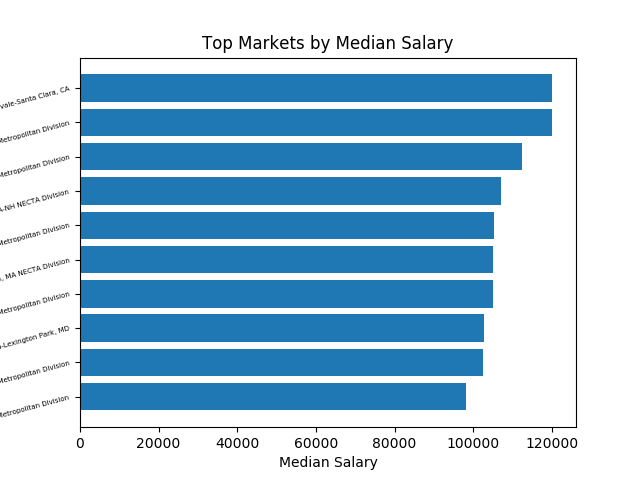

In [38]:
def plotTopSalary():
    topSalary, topSalaryGrowth = topSalaryData(df, df2017, compare)
    xvals = (topSalary['AREA_NAME']).values
    xpos = np.arange(len(xvals))
    salary = (topSalary['A_MEDIAN_2017']).values

    plt.barh(xpos, salary)
    plt.gca().invert_yaxis()
    plt.ylabel("Market", fontsize=5)
    plt.xlabel('Median Salary')
    plt.yticks(xpos, xvals, fontsize=5, rotation=15)
    plt.title("Top Markets by Median Salary")
    plt.show()
plotTopSalary()